<p style="color:brown;font-size:20px">Incase you like this notebook do not forget to give an <span style="color:purple;font-size:30px">UPVOTE</span>. Thank you for viewing.

![](https://venturebeat.com/wp-content/uploads/2018/09/natural-language-processing-e1572968977211.jpg?w=1200&strip=all)

<p style="color:red">This notebook is all about NLP which is a very hot topic in the field of machine learning and deeplearning for a while now.The notebook is sure a big longer but please stick with me to learn about NLPs. It'll surely help you a lot if you are beginner in the topic
If you are just beginning to learn about NLP(Natural Language Processing) and its applications please refer to the link i have provided below to get the very basic knowledge about it :
    
https://towardsdatascience.com/a-gentle-introduction-to-natural-language-processing-e716ed3c0863 <---- <span style="color:purple">Introduction to NLP </span>

                                                                                                       
<p style="color:red">If you are using python as your language for ML it provides various tools to process text in different ways. Some of them are :
<ul style="color:green">
    <li>SkLearn</li>
    <li>Tensorflow</li> 
    <li>Spacy</li>
    <li>NLTK - Natural Language Toolkit </li>
    <li>Gensim</li>
    <li>OpenNLP</li>
    etc..
</ul>

<p style="color:red">If you want to get an idea about these tools just refer to the link below :

https://towardsdatascience.com/5-heroic-tools-for-natural-language-processing-7f3c1f8fc9f0 <--- <span style="color:purple">Tools for NLP</span>

<p style="color:red">Here is a very interesting article about NLP which shows a bit more about the components of the topic. It is a good read if you are interested 

https://towardsdatascience.com/natural-language-processing-a1496244c15c#:~:text=Natural%20Language%20Processing%20(NLP)%20is,algorithms%20to%20text%20and%20speech 

<p style="color:red">Now let us move forward

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt


<h2 style="color:orange">Importing Libraries :</h2>

<p style="color:red">I am going to import the basic necessities required for NLP. If you are not familier with some of them dont worry as you will learn about them sooner or later in this notebook. :)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from tqdm import tqdm

from gensim.parsing.preprocessing import remove_stopwords
from bs4 import BeautifulSoup
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import classification_report,f1_score

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

import torch
import transformers

Using TensorFlow backend.
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


<h2 style="color:orange">Reading the data :</h2>

<p style="color:red">I am now gonna read the data here in the .csv files

In [3]:
train = pd.read_csv(r'/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv(r'/kaggle/input/nlp-getting-started/test.csv')

In [4]:
print('Number of datapoints in the train dataset : ',train.shape[0])
print('Number of datapoints in the test dataset : ',test.shape[0])

Number of datapoints in the train dataset :  7613
Number of datapoints in the test dataset :  3263


In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


<h2 style="color:orange">Data Preprocessing :</h2>
<p style="color:red">Here i am going to write the preprocessing functions that i am going to use in this notebook. If you want to learn about stemming,lemmatization etc just refer to the link given below :</p>

https://towardsdatascience.com/nlp-text-preprocessing-a-practical-guide-and-template-d80874676e79

In [9]:
#removing any shortforms if present
def remove_shortforms(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

def remove_special_char(text):
    text = re.sub('[^A-Za-z0-9]+'," ",text)
    return text

def remove_wordswithnum(text):
    text = re.sub("\S*\d\S*", "", text).strip()
    return text

def lowercase(text):
    text = text.lower()
    return text

def remove_stop_words(text):
    text = remove_stopwords(text)
    return text

st = SnowballStemmer(language='english')
def stemming(text):
    r= []
    for word in text :
        a = st.stem(word)
        r.append(a)
    return r

def listToString(s):  
    str1 = " "   
    return (str1.join(s))

def remove_punctuations(text):
    text = re.sub(r'[^\w\s]','',text)
    return text

def remove_links(text):
    text = re.sub(r'http\S+', '', text)
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    text = lemmatizer.lemmatize(text)
    return text

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

<p style="color:purple">I have seperated the target variables with the dataset here and concatenated the train and test dataset into another dataset using pd.concat which is a function in pandas library in python.

In [10]:
Y = train['target']
train = train.drop('target',axis=1)
data = pd.concat([train,test],axis=0).reset_index(drop=True)
data.head()

,id,keyword,location,text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...


<p style="color:red">Here i am converting all the text sentences into str just to make sure my code does not get stuck at any point later on.

In [11]:
for i in range(len(data['text'])):
    data['text'][i] = str(data['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
data['text'][1]

'Forest fire near La Ronge Sask. Canada'

<p style="color:red">Now lets preprocess the data using the functions defined above

In [13]:
for i in range(len(data['text'])):
    data['text'][i] = remove_shortforms(data['text'][i])
    data['text'][i] = remove_special_char(data['text'][i])
    data['text'][i] = remove_wordswithnum(data['text'][i])
    data['text'][i] = lowercase(data['text'][i])
    data['text'][i] = remove_stop_words(data['text'][i])
    text = data['text'][i]
    text = text.split()
    data['text'][i] = stemming(text)
    s = data['text'][i]
    data['text'][i] = listToString(s)
    data['text'][i] = lemmatize_words(data['text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

<p style="color:purple">Look above and see how the sentence changes before and after preprocessing as i have removed stopwords, converted characters to lowercase and applied lemmatization  etc....

In [14]:
data['text'][1]

'forest near la rong sask canada'

<h2 style="color:orange">Bag of words :</h2>
<p style="color:red">The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 
If you are not familier with bag of words this article is for you :

https://machinelearningmastery.com/gentle-introduction-bag-words-model/ <--- <span style="color:purple">Bag of Words</span>

<p style="color:red">In sklearn which is a very famous lirary in python bag of words is used as the fuction CountVectorizer.For its documentation in sklearb refer to this link below 

* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html <--- <span style="color:purple">Documentation</span>

In [15]:
cv = CountVectorizer(ngram_range=(1,3))
text_bow = cv.fit_transform(data['text'])
print(text_bow.shape)

(10876, 136413)


<p style="color:green">Now i am splitting the training and text data with BOW encoding which i had combined earlier to get the dictionary of all words present in the train as well as the text data

In [16]:
train_text = text_bow[:train.shape[0]] 
test_text = text_bow[train.shape[0]:] 

In [17]:
print(train_text.shape)
print(test_text.shape)

(7613, 136413)
(3263, 136413)


<h2 style="color:orange">Train test split :</h2>

<p style="color:purple">The fuction used for splitting the train and test data is a sklearn function. For its documentation refer to :
    
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html <--- <span style="color:red">Train Test split</span>

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(train_text,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090, 136413)
(1523, 136413)
(6090,)
(1523,)


<p style="color:green">Lets try Logistic Regression with some hyperparameter tuning on the BOW encoded data:
    
    
<p style="color:red">If you want to try hyperparameter tuning on your system just uncomment the code in the next block

<h2 style="color:orange">Logistic Regression with BOW :

In [19]:
# lr = LogisticRegression(max_iter=2000)

# params = {
#     'C' :[0.0001,0.001,0.01,0.1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,1,2,3,4,5,6,7,10,100,1000],
#     'penalty': ['l1','l2']
# }

# clf = RandomizedSearchCV(lr,params,n_jobs=-1,cv=10)
# clf.fit(X_train,Y_train)
# print(clf.best_params_)

In [20]:
lr = LogisticRegression(C=10,penalty='l2')
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
print("F1 score :",f1_score(Y_test,pred))
print("Classification Report \n\n:",classification_report(Y_test,pred))

F1 score : 0.7626016260162602
Classification Report 

:               precision    recall  f1-score   support

           0       0.79      0.90      0.84       849
           1       0.84      0.70      0.76       674

    accuracy                           0.81      1523
   macro avg       0.82      0.80      0.80      1523
weighted avg       0.81      0.81      0.81      1523



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<h2 style="color:orange">Predictions and Submission :

In [21]:
lr = LogisticRegression(C=10,penalty='l2',max_iter=2000)
lr.fit(train_text,Y)
pred = lr.predict(test_text)
submit = pd.DataFrame(test['id'],columns=['id'])
print(len(pred))
submit.head()

3263


,id
0,0
1,2
2,3
3,9
4,11


In [22]:
submit['target'] = pred
submit.to_csv("realnlp.csv",index=False)

<h1 style="color:orange">TFIDF encoding of the text data :</h1>

<p style="color:red">To learn more about TFIDF just follow this link below :
    
https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3 <--- <span style="color:purple">TFIDF encoding of text</span>

<p style="color:red">In sklearn TFIDF is applied using the fuction TfidfVectorizer.For its documentation in sklearn refer to this link below :

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html <--- <span style="color:purple">Documentation</span>

In [23]:
tfidf = TfidfVectorizer(ngram_range=(1,3))
text_tfidf = tfidf.fit_transform(data['text'])
print(text_tfidf.shape)

(10876, 136413)


In [24]:
train_text = text_tfidf[:train.shape[0]] 
test_text = text_tfidf[train.shape[0]:] 
print(train_text.shape)
print(test_text.shape)

(7613, 136413)
(3263, 136413)


In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(train_text,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090, 136413)
(1523, 136413)
(6090,)
(1523,)


<h2 style="color:orange">Logistic Regression with TFIDF encoding :

In [26]:
# lr = LogisticRegression(max_iter=2000)

# params = {
#     'C' :[0.0001,0.001,0.01,0.1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,1,2,3,4,5,6,7,10,100,1000],
#     'penalty': ['l1','l2']
# }

# clf = RandomizedSearchCV(lr,params,n_jobs=-1,cv=10)
# clf.fit(X_train,Y_train)
# print(clf.best_params_)

In [27]:
lr = LogisticRegression(C=100,penalty='l2',max_iter=2000)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
print("F1 score :",f1_score(Y_test,pred))
print("Classification Report :",classification_report(Y_test,pred))

F1 score : 0.7385398981324278
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.90      0.84       871
           1       0.83      0.67      0.74       652

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



<p style="color:magenta">The feature location is not a useful feature in the data as we have so many missing values in it which cannot be dealt with properly. Therefore i am not gonna perform any calculations using the location feature

<h2 style="color:turquoise;font-size:30px">2. Lets use the Keywords feature and see if the results change 

In [28]:
print("Number of null values in data keywords column : ",data['keyword'].isnull().sum())

Number of null values in data keywords column :  87


In [29]:
data.head()

,id,keyword,location,text
0,1,NaN,NaN,deed reason earthquak allah forgiv
1,4,NaN,NaN,forest near la rong sask canada
2,5,NaN,NaN,resid ask ishelt place notifi offic evacu shel...
3,6,NaN,NaN,peopl receiv wildfir evacu order california
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...


<p style="color:green">Filling the missing or null values in the keyword feature as 'unknown'

In [30]:
data['keyword'] = data['keyword'].fillna("unknown")
data.head()

,id,keyword,location,text
0,1,unknown,NaN,deed reason earthquak allah forgiv
1,4,unknown,NaN,forest near la rong sask canada
2,5,unknown,NaN,resid ask ishelt place notifi offic evacu shel...
3,6,unknown,NaN,peopl receiv wildfir evacu order california
4,7,unknown,NaN,got sent photo rubi alaska smoke wildfir pour ...


<p style="color:red">Combining the text and the keywords togther

<p style="color:red">Here i have used keyword after the text 3 times to give it more weight as we are predicting the text refers to a disaster or not. Maybe it will help lets see if it does

In [31]:
combined_text = [None] * len(data['text'])
for i in range(len(data['text'])):
    if data['keyword'][i] == 'unknown':
        combined_text[i] = data['text'][i]
    else:
        combined_text[i] = data['text'][i] + " " + data['keyword'][i] + " " + data['keyword'][i] + " " + data['keyword'][i]
data['combined_text'] = combined_text

In [32]:
data['combined_text'][88]

'accid left lane block manchest rt nb eddi rd stop traffic nh delay min traffic accident accident accident'

In [33]:
for i in range(len(data['combined_text'])):
    data['combined_text'][i] = str(data['combined_text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<p style="color:purple">Preprocessing the combined data :

In [34]:
for i in range(len(data['combined_text'])):
    data['combined_text'][i] = remove_shortforms(data['combined_text'][i])
    data['combined_text'][i] = remove_special_char(data['combined_text'][i])
    data['combined_text'][i] = remove_wordswithnum(data['combined_text'][i])
    data['combined_text'][i] = lowercase(data['combined_text'][i])
    data['combined_text'][i] = remove_stop_words(data['combined_text'][i])
    text = data['combined_text'][i]
    text = text.split()
    data['combined_text'][i] = stemming(text)
    s = data['combined_text'][i]
    data['combined_text'][i] = listToString(s)
    data['combined_text'][i] = lemmatize_words(data['combined_text'][i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [35]:
data['combined_text'][88]

'accid left lane block manchest rt nb eddi rd stop traffic nh delay min traffic accid accid accid'

<h2 style="color:orange">Bag of Words with keywords :</h2>
    
<p style="color:red">Applying BOW with the combined text

In [36]:
cv = CountVectorizer(ngram_range=(1,3))
text_bow = cv.fit_transform(data['combined_text'])
print(text_bow.shape)

(10876, 153979)


In [37]:
train_text = text_bow[:train.shape[0]] 
test_text = text_bow[train.shape[0]:] 

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(train_text,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090, 153979)
(1523, 153979)
(6090,)
(1523,)


<h2 style="color:orange">Logistic Regression with BOW :

In [39]:
# lr = LogisticRegression(max_iter=2000)

# params = {
#     'C' :[0.0001,0.001,0.01,0.1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,1,2,3,4,5,6,7,10,100,1000],
#     'penalty': ['l1','l2']
# }

# clf = RandomizedSearchCV(lr,params,n_jobs=-1,cv=10)
# clf.fit(X_train,Y_train)
# print(clf.best_params_)

In [40]:
lr = LogisticRegression(C=1,penalty='l2',max_iter=2000)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
print("F1 score :",f1_score(Y_test,pred))
print("Classification Report :",classification_report(Y_test,pred))

F1 score : 0.736318407960199
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.85      0.83       895
           1       0.77      0.71      0.74       628

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



<h2 style="color:red">TFIDF with keyword features :</h2>

<p style="color:orange">Applying TFIDF with combined text

In [41]:
tfidf = TfidfVectorizer(ngram_range=(1,3))
text_tfidf = tfidf.fit_transform(data['combined_text'])
print(text_tfidf.shape)

(10876, 153979)


In [42]:
train_text = text_tfidf[:train.shape[0]] 
test_text = text_tfidf[train.shape[0]:] 

In [43]:
X_train,X_test,Y_train,Y_test = train_test_split(train_text,Y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6090, 153979)
(1523, 153979)
(6090,)
(1523,)


<h2 style="color:orange">Logistic Regression with TFIDF encoding :

In [44]:
# lr = LogisticRegression(max_iter=2000)

# params = {
#     'C' :[0.0001,0.001,0.01,0.1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,1,2,3,4,5,6,7,10,100,1000],
#     'penalty': ['l1','l2']
# }

# clf = RandomizedSearchCV(lr,params,n_jobs=-1,cv=10)
# clf.fit(X_train,Y_train)
# print(clf.best_params_)

In [45]:
lr = LogisticRegression(C=2,penalty='l2',max_iter=2000)
lr.fit(X_train,Y_train)
pred = lr.predict(X_test)
print("F1 score :",f1_score(Y_test,pred))
print("Classification Report :",classification_report(Y_test,pred))

F1 score : 0.7007544006705784
Classification Report :               precision    recall  f1-score   support

           0       0.76      0.86      0.81       873
           1       0.77      0.64      0.70       650

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.75      1523
weighted avg       0.77      0.77      0.76      1523



<h1 style="color:turquoise;font-size:50px">3. Word Embeddings :</h1>
    
<p style="color:red">Word embedding are also a very popular way to approach an NLP problem in which words are converted into vectors and used in various ML and deeplearning models.

<p style="color:red">To know more refer to the link below :
    
https://machinelearningmastery.com/what-are-word-embeddings/ <--- <span style="color:purple">Word Embeddings</span>

<p style="color:red">Here i have used GLOVE vectors dataset for my word embeddings. You can download them either on the internet but i have just used this glove dataset provided on kaggle itself to carry out the task. 

<p style="color:red">Here is the link :

https://www.kaggle.com/rtatman/glove-global-vectors-for-word-representation <--- <span style="color:purple">Glove Vectors</span>

In [46]:
print('Loading word vectors...')
word2vec = {}
with open(os.path.join('../input/glove-global-vectors-for-word-representation/glove.6B.200d.txt'), encoding = "utf-8") as f:
  # is just a space-separated text file in the format:
  # word vec[0] vec[1] vec[2] ...
    for line in f:
        values = line.split() #split at space
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32') #numpy.asarray()function is used when we want to convert input to an array.
        word2vec[word] = vec
print('Found %s word vectors.' % len(word2vec))

Loading word vectors...
Found 400000 word vectors.


In [47]:
train = pd.read_csv(r'/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv(r'/kaggle/input/nlp-getting-started/test.csv')

In [48]:
Y = train['target']
train = train.drop('target',axis=1)
data = pd.concat([train,test],axis=0).reset_index(drop=True)
text_data = data['text']

In [49]:
text_data

0        Our Deeds are the Reason of this #earthquake M...
1                   Forest fire near La Ronge Sask. Canada
2        All residents asked to 'shelter in place' are ...
3        13,000 people receive #wildfires evacuation or...
4        Just got sent this photo from Ruby #Alaska as ...
                               ...                        
10871    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872    Storm in RI worse than last hurricane. My city...
10873    Green Line derailment in Chicago http://t.co/U...
10874    MEG issues Hazardous Weather Outlook (HWO) htt...
10875    #CityofCalgary has activated its Municipal Eme...
Name: text, Length: 10876, dtype: object

<p style="color:green">For tokenizing the data i have used the keras.preprocessing fuction called Tokenizer.
    You can search on google for its documentation

In [50]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [51]:
word2index = tokenizer.word_index
print("Number of unique tokens : ",len(word2index))

Number of unique tokens :  29319


<p style="color:red">Here i have done padding on the data itself so as to convert it into equal sized vectors which are processed by the models i am going to use later on these embeddings.

<p style="color:green">To know more about padding of vectors just refer to the video below :

https://www.coursera.org/lecture/natural-language-processing-tensorflow/padding-2Cyzs <--- <span style="color:purple">Padding</span>

In [52]:
data_padded = pad_sequences(sequences,100)
print(data_padded.shape)

(10876, 100)


In [53]:
data_padded[6]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,  209,   76,
        928,  305, 1120,  898,  318,    8, 1822,    7, 8819, 1121, 2833,
       1701], dtype=int32)

In [54]:
train_pad = data_padded[:train.shape[0]]
test_pad = data_padded[train.shape[0]:]

In [55]:
embedding_matrix = np.zeros((len(word2index)+1,200))

embedding_vec=[]
for word, i in tqdm(word2index.items()):
    embedding_vec = word2vec.get(word)
    if embedding_vec is not None:
        embedding_matrix[i] = embedding_vec

100%|██████████| 29319/29319 [00:00<00:00, 343242.49it/s]


In [56]:
print(embedding_matrix[1])

[ 0.42596    -0.18836001 -0.65114999  0.72987998  0.86216003 -0.019028
  0.036413    0.1523     -0.68856001 -0.15668    -0.95084    -0.31977999
 -0.068708   -0.024405    0.43847999 -0.86860001 -0.70468998  0.69516999
 -0.34474999 -0.42296001 -0.063272    1.41009998 -0.29916999 -0.21626
  0.49923    -0.39030001 -0.24457     0.46623001 -0.34628001  0.43127
 -0.029171   -0.10703    -0.27767    -0.27489999 -0.29686001 -0.070478
 -0.22352    -0.19773    -0.35326999  0.50875002 -0.20914     0.11628
 -0.11        0.073406   -0.20166001 -0.15911999  0.82756001 -1.02269995
 -0.44795999 -0.30778     0.76523     0.038303    0.41332999  0.26712999
  0.11064     0.08586    -0.96186     0.30057001  0.46037999 -0.092862
  0.4129     -0.13422    -0.3423      0.27595001 -0.10514    -0.45127001
 -0.29933    -0.057127    0.66608     0.91301     0.46173999 -0.11539
  0.35907999 -0.51762003 -0.20130999  1.0223     -0.023316   -0.49261001
 -0.21956     0.55855    -0.11224    -0.17603999  0.26923999  0.24890

<p style="color:purple">You can use Ml models here but i have used Deeplearning with the word embeddings.Lets see what kind of results we get

<h1 style="color:magenta;font-size:50px;">RNN :</h1>

![](https://cdn-images-1.medium.com/fit/t/1600/480/1*go8PHsPNbbV6qRiwpUQ5BQ.png)



<h2 style="color:orange">LSTM :</h2> 

![](https://miro.medium.com/max/2840/1*0f8r3Vd-i4ueYND1CUrhMA.png)

<p style="color:red">To learn more about LSTM's and how they actually work please use the links below:

https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/ <--- <span style="color:purple">LSTM introduction</span>

https://www.coursera.org/lecture/nlp-sequence-models/long-short-term-memory-lstm-KXoay <--- <span style="color:purple">LSTMs</span>

In [57]:
model1 = keras.models.Sequential([
    keras.layers.Embedding(len(word2index)+1,200,weights=[embedding_matrix],input_length=100,trainable=False),
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(200),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

In [58]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 200)          5864000   
_________________________________________________________________
lstm (LSTM)                  (None, 100, 100)          120400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               240800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 6,225,401
Trainable params: 361,401
Non-trainable params: 5,864,000
_________________________________________________________________


In [59]:
model1.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)

In [60]:
history1 = model1.fit(train_pad,Y,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2
)

Epoch 1/10
96/96 [==============================] - 2s 25ms/step - loss: 0.4991 - accuracy: 0.7686 - val_loss: 0.4570 - val_accuracy: 0.8017
Epoch 2/10
96/96 [==============================] - 2s 17ms/step - loss: 0.4432 - accuracy: 0.8074 - val_loss: 0.4410 - val_accuracy: 0.8129
Epoch 3/10
96/96 [==============================] - 2s 18ms/step - loss: 0.4176 - accuracy: 0.8205 - val_loss: 0.4197 - val_accuracy: 0.8102
Epoch 4/10
96/96 [==============================] - 2s 17ms/step - loss: 0.4026 - accuracy: 0.8256 - val_loss: 0.4015 - val_accuracy: 0.8188
Epoch 5/10
96/96 [==============================] - 2s 17ms/step - loss: 0.3830 - accuracy: 0.8402 - val_loss: 0.4407 - val_accuracy: 0.8011
Epoch 6/10
96/96 [==============================] - 2s 17ms/step - loss: 0.3588 - accuracy: 0.8504 - val_loss: 0.4386 - val_accuracy: 0.8129
Epoch 7/10
96/96 [==============================] - 2s 17ms/step - loss: 0.3317 - accuracy: 0.8616 - val_loss: 0.4490 - val_accuracy: 0.8096
Epoch 8/10
96

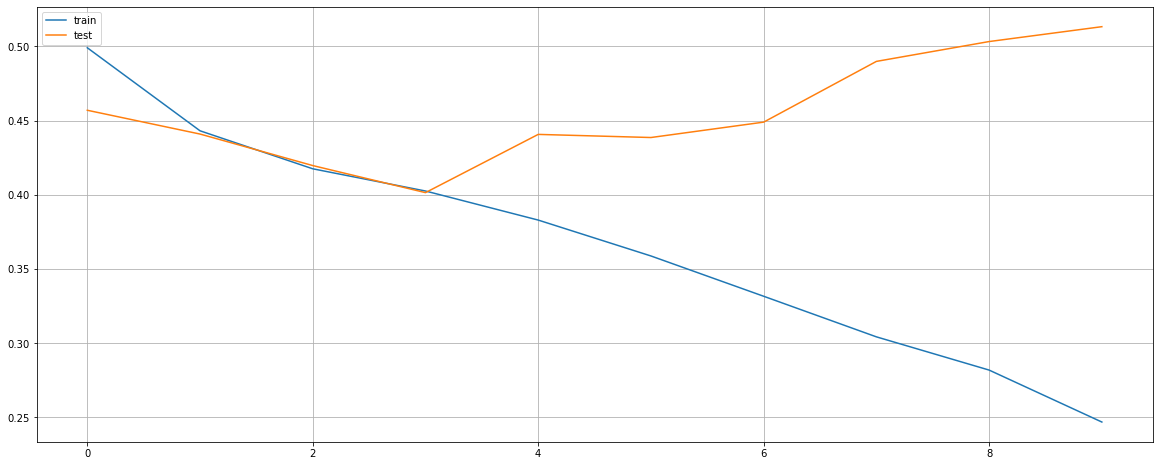

In [61]:
plt.figure(figsize=(20,8))
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

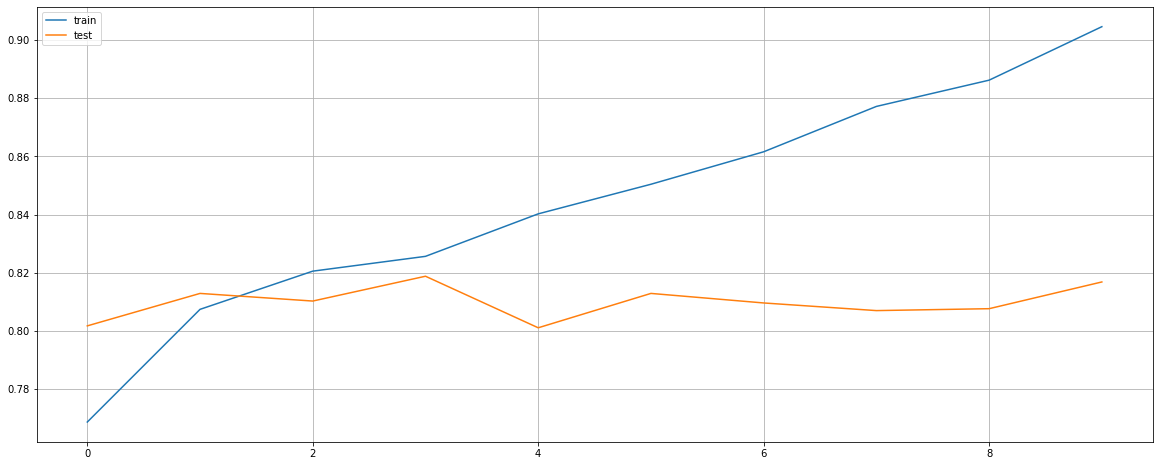

In [62]:
plt.figure(figsize=(20,8))
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

<h2 style="color:orange">GRU :</h2> 

![](https://technopremium.com/blog/wp-content/uploads/2019/06/gru-1-1200x600.png)

<p style="color:red">Let us use GRU's to see if the results change or not

<p style="color:red">If you want to know more about GRU and how they work please refer to the links below 

https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be <--- <span style="color:purple">GRU inroduction</span>

https://www.coursera.org/lecture/nlp-sequence-models/gated-recurrent-unit-gru-agZiL <--- <span style="color:purple">GRU</span>

In [63]:
model2 = keras.models.Sequential([
    keras.layers.Embedding(len(word2index)+1,200,weights=[embedding_matrix],input_length=100,trainable=False),
    keras.layers.GRU(100,return_sequences=True),
    keras.layers.GRU(200),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

In [64]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          5864000   
_________________________________________________________________
gru (GRU)                    (None, 100, 100)          90600     
_________________________________________________________________
gru_1 (GRU)                  (None, 200)               181200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 6,136,001
Trainable params: 272,001
Non-trainable params: 5,864,000
_________________________________________________________________


In [65]:
model2.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)

In [66]:
history2 = model2.fit(train_pad,Y,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2
)

Epoch 1/10
96/96 [==============================] - 2s 21ms/step - loss: 0.5205 - accuracy: 0.7483 - val_loss: 0.4401 - val_accuracy: 0.8063
Epoch 2/10
96/96 [==============================] - 1s 15ms/step - loss: 0.4345 - accuracy: 0.8112 - val_loss: 0.4321 - val_accuracy: 0.8070
Epoch 3/10
96/96 [==============================] - 1s 15ms/step - loss: 0.4162 - accuracy: 0.8233 - val_loss: 0.4339 - val_accuracy: 0.8148
Epoch 4/10
96/96 [==============================] - 2s 18ms/step - loss: 0.3934 - accuracy: 0.8351 - val_loss: 0.4030 - val_accuracy: 0.8293
Epoch 5/10
96/96 [==============================] - 1s 15ms/step - loss: 0.3740 - accuracy: 0.8417 - val_loss: 0.4288 - val_accuracy: 0.8148
Epoch 6/10
96/96 [==============================] - 1s 15ms/step - loss: 0.3569 - accuracy: 0.8484 - val_loss: 0.4273 - val_accuracy: 0.8129
Epoch 7/10
96/96 [==============================] - 1s 15ms/step - loss: 0.3228 - accuracy: 0.8642 - val_loss: 0.4786 - val_accuracy: 0.8017
Epoch 8/10
96

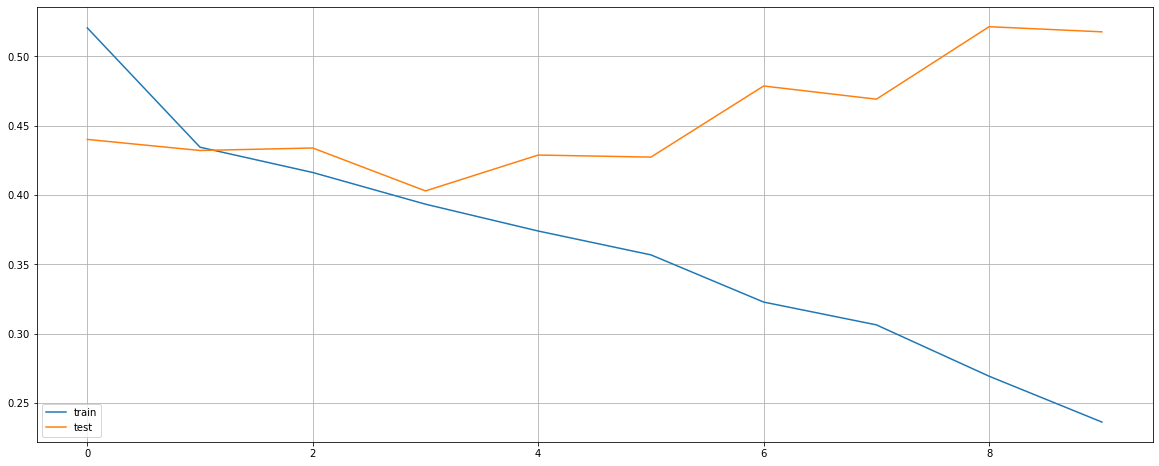

In [67]:
plt.figure(figsize=(20,8))
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

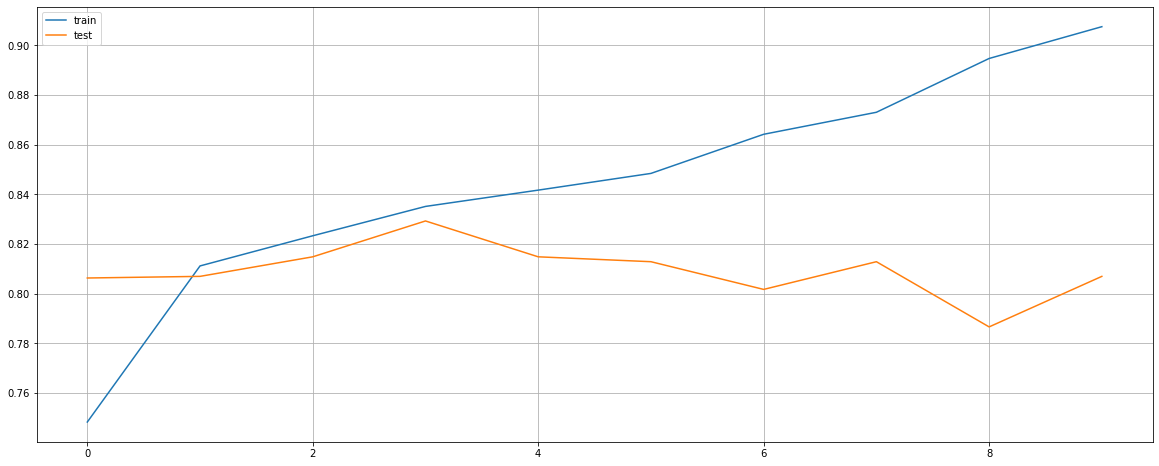

In [68]:
plt.figure(figsize=(20,8))
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

<h2 style="color:orange">Bidirectional LSTM :</h2>

![](https://www.i2tutorials.com/wp-content/uploads/2019/05/Deep-Dive-into-Bidirectional-LSTM-i2tutorials.jpg)

<p style="color:red">Let us use Bidirectional LSTM's to see if the results change or not

<p style="color:red">If you want to know more about Bidirectional LSTM and how they work please refer to the links below 

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/ <--- <span style="color:purple">Bidirectional LSTM inroduction</span>

https://www.coursera.org/lecture/nlp-sequence-models/bidirectional-rnn-fyXnn<--- <span style="color:purple">Bidirectional LSTM</span>

In [69]:
model3 = keras.models.Sequential([
    keras.layers.Embedding(len(word2index)+1,200,weights=[embedding_matrix],input_length=100,trainable=False),
    keras.layers.Bidirectional(keras.layers.LSTM(100,return_sequences=True)),
    keras.layers.Bidirectional(keras.layers.LSTM(200)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

In [70]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          5864000   
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 200)          240800    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               641600    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 6,746,801
Trainable params: 882,801
Non-trainable params: 5,864,000
_________________________________________________________________


In [71]:
model3.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy'],
)

In [72]:
history3 = model3.fit(train_pad,Y,
                    batch_size=64,
                    epochs=10,
                    validation_split=0.2
)

Epoch 1/10
96/96 [==============================] - 4s 46ms/step - loss: 0.4961 - accuracy: 0.7667 - val_loss: 0.4166 - val_accuracy: 0.8102
Epoch 2/10
96/96 [==============================] - 3s 36ms/step - loss: 0.4353 - accuracy: 0.8166 - val_loss: 0.4009 - val_accuracy: 0.8207
Epoch 3/10
96/96 [==============================] - 3s 34ms/step - loss: 0.4123 - accuracy: 0.8235 - val_loss: 0.4120 - val_accuracy: 0.8227
Epoch 4/10
96/96 [==============================] - 3s 35ms/step - loss: 0.3888 - accuracy: 0.8343 - val_loss: 0.4132 - val_accuracy: 0.8227
Epoch 5/10
96/96 [==============================] - 3s 34ms/step - loss: 0.3743 - accuracy: 0.8460 - val_loss: 0.4073 - val_accuracy: 0.8306
Epoch 6/10
96/96 [==============================] - 3s 34ms/step - loss: 0.3444 - accuracy: 0.8535 - val_loss: 0.4574 - val_accuracy: 0.8096
Epoch 7/10
96/96 [==============================] - 3s 34ms/step - loss: 0.3167 - accuracy: 0.8672 - val_loss: 0.4934 - val_accuracy: 0.8076
Epoch 8/10
96

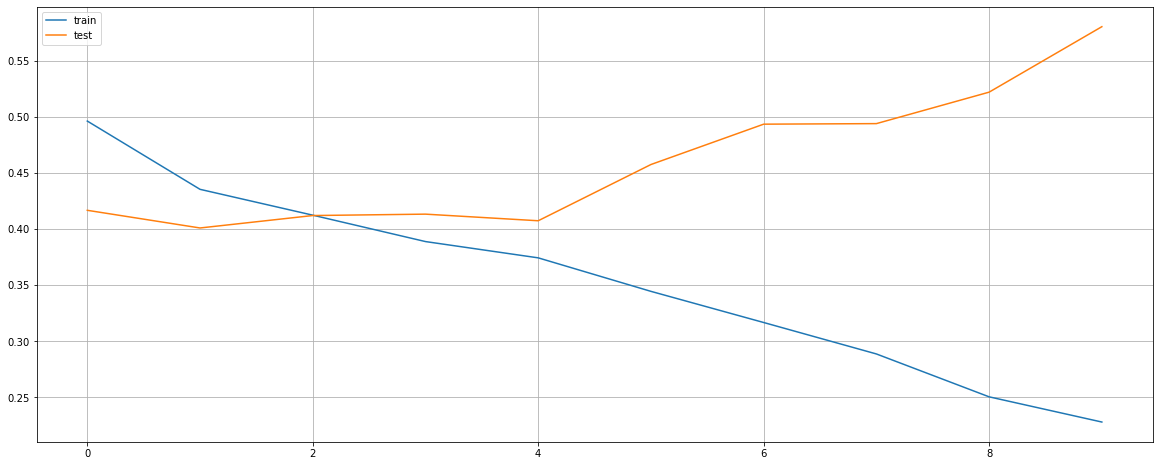

In [73]:
plt.figure(figsize=(20,8))
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

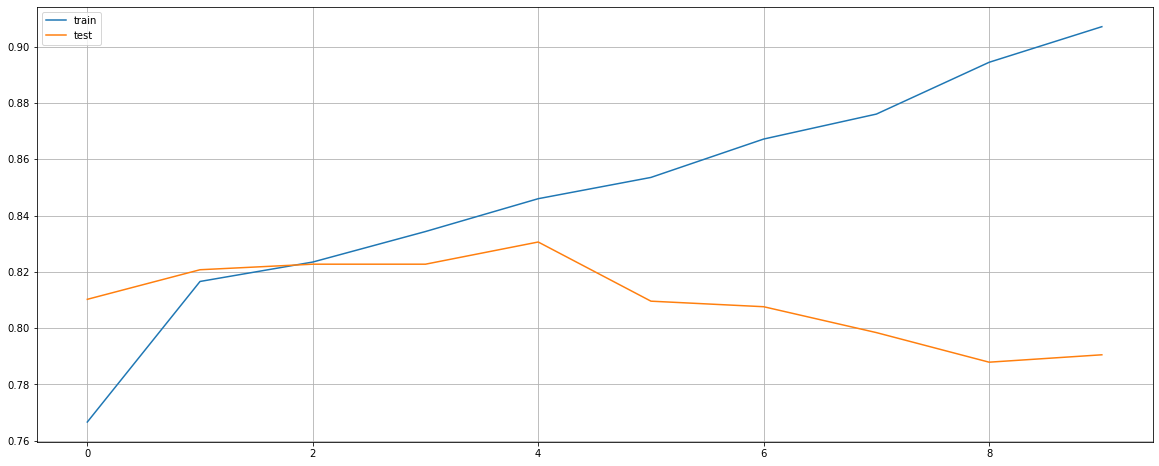

In [74]:
plt.figure(figsize=(20,8))
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

<p style="color:red">You guys can also try Bidirectional GRU if you feel like it

<h2 style="color:orange">Early Stopping :</h2>

<p style="color:red">Let me try to show you how  early stopping works to determine the best validation accuracy for the model as we can see that the accuracy is maximun in the starting epochs and decreasing as we go further. Here i kept the monitor for early stopping as val_accuracy.

https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/ <--- <span style="color:purple">Early Stopping

<p style="color:green">Let me use early stopping on the Bidirectional LSTM model to show how it works

In [75]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)

In [76]:
history = model3.fit(train_pad,Y,
                    batch_size=64,
                    epochs=30,
                    validation_split=0.2,
                    callbacks=[es]
)

Epoch 1/30
96/96 [==============================] - 3s 34ms/step - loss: 0.1924 - accuracy: 0.9238 - val_loss: 0.6798 - val_accuracy: 0.7938
Epoch 2/30
96/96 [==============================] - 3s 35ms/step - loss: 0.1800 - accuracy: 0.9296 - val_loss: 0.6474 - val_accuracy: 0.7853
Epoch 3/30
96/96 [==============================] - 3s 34ms/step - loss: 0.1498 - accuracy: 0.9392 - val_loss: 0.7377 - val_accuracy: 0.7768
Epoch 4/30
96/96 [==============================] - 3s 34ms/step - loss: 0.1266 - accuracy: 0.9479 - val_loss: 0.8143 - val_accuracy: 0.7827
Epoch 00004: early stopping


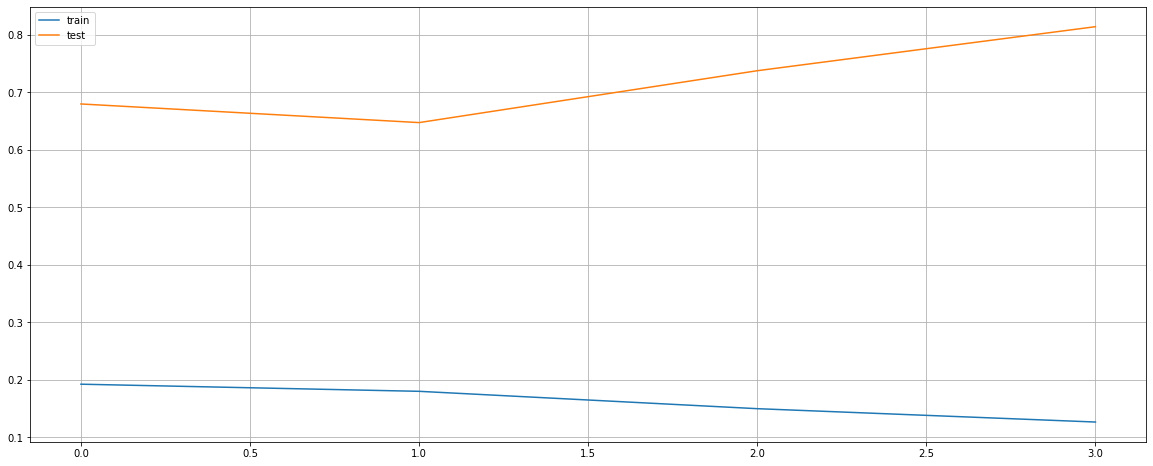

In [77]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

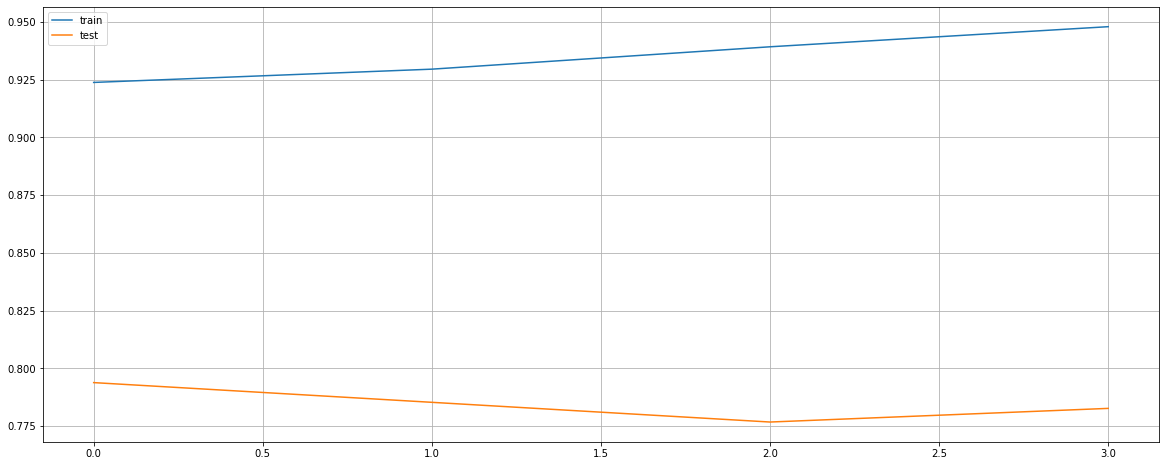

In [78]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

<h2 style="color:orange">Predictions and Submissions :

In [79]:
submit = pd.DataFrame(test['id'],columns=['id'])
predictions = model3.predict(test_pad)
submit['target_prob'] = predictions
submit.head()

,id,target_prob
0,0,0.779544
1,2,0.999786
2,3,0.998667
3,9,0.998311
4,11,0.999699


In [80]:
target = [None]*len(submit)
for i in range(len(submit)):
    target[i] = np.round(submit['target_prob'][i]).astype(int)
submit['target'] = target
submit.head()

,id,target_prob,target
0,0,0.779544,1
1,2,0.999786,1
2,3,0.998667,1
3,9,0.998311,1
4,11,0.999699,1


In [81]:
submit = submit.drop('target_prob',axis=1)
submit.to_csv('real-nlp_lstm.csv',index=False)

<h1 style="color:turquoise"><span style="color:darkblue;font-size:50px">4. BERT</span> (Bidirectional Encoder Representations from Transformers) :</h1>

![](https://searchengineland.com/figz/wp-content/seloads/2019/10/GoogleBert_1920.jpg)

<p style="color:green">It is an open-sourced NLP pre-training model developed by researchers at Google in 2018 and it preforms very well with text data as compared to other models.

<p style="color:green">Most of us may not have an idea about it as i have recently started learning about it too. I am gonna provide some links which are very helpful in starting with it. Just follow them up for the idea about transformers and BERT models
 
http://jalammar.github.io/illustrated-transformer/ <--- <span style="color:purple">Transformers</span>

http://jalammar.github.io/illustrated-bert/ <--- <span style="color:purple">BERT introduction</span>

https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/ <--- <span style="color:purple">BERT</span>

In [82]:
train = pd.read_csv(r'/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv(r'/kaggle/input/nlp-getting-started/test.csv')

In [83]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [84]:
Y = train['target']
train = train.drop('target',axis=1)
text_data_train = train['text']
text_data_test = test['text']

In [85]:
Y.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [86]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)
bert_model = transformers.TFBertModel.from_pretrained('bert-large-uncased')

In [87]:
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [88]:
train_input_ids,train_attention_masks = bert_encode(text_data_train,100)
test_input_ids,test_attention_masks = bert_encode(text_data_test,100)

In [89]:
train_input_ids[1]

array([  101,  3224,  2543,  2379,  2474,  6902,  3351, 21871,  2243,
        1012,  2710,   102,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0])

In [90]:
train_attention_masks[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [91]:
def create_model(bert_model):
    input_ids = tf.keras.Input(shape=(100,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(100,),dtype='int32')
  
    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    model.compile(Adam(lr=6e-6), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [92]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     ((None, 100, 1024),  335141888   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 1)            1025        tf_bert_model[0][1]          

In [93]:
history = model.fit([train_input_ids,train_attention_masks],Y,
                    validation_split=0.2,
                    epochs=3,
                    batch_size=5)

Epoch 1/3
1218/1218 [==============================] - 313s 257ms/step - loss: 0.4501 - accuracy: 0.7982 - val_loss: 0.3932 - val_accuracy: 0.8464
Epoch 2/3
1218/1218 [==============================] - 308s 253ms/step - loss: 0.3426 - accuracy: 0.8644 - val_loss: 0.3783 - val_accuracy: 0.8470
Epoch 3/3
1218/1218 [==============================] - 308s 253ms/step - loss: 0.2890 - accuracy: 0.8892 - val_loss: 0.4062 - val_accuracy: 0.8326


<p style="color:teal">I just ran it for 3 epochs because i got an okayish accuracy but you can change that according to your convenience.

<p style="color:red">You can also use early stopping here if you'd like

In [94]:
# es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',mode='max',verbose=1,patience=3)

In [95]:
# history = model.fit([train_input_ids,train_attention_masks],Y,
#                     batch_size=10,
#                     epochs=10,
#                     validation_split=0.2,
#                     callbacks=[es]
# )

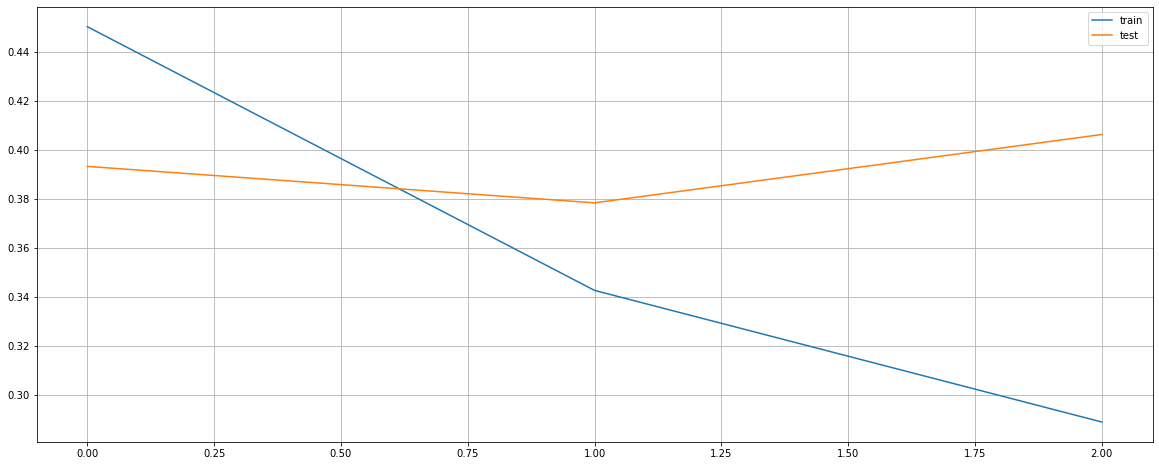

In [96]:
plt.figure(figsize=(20,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

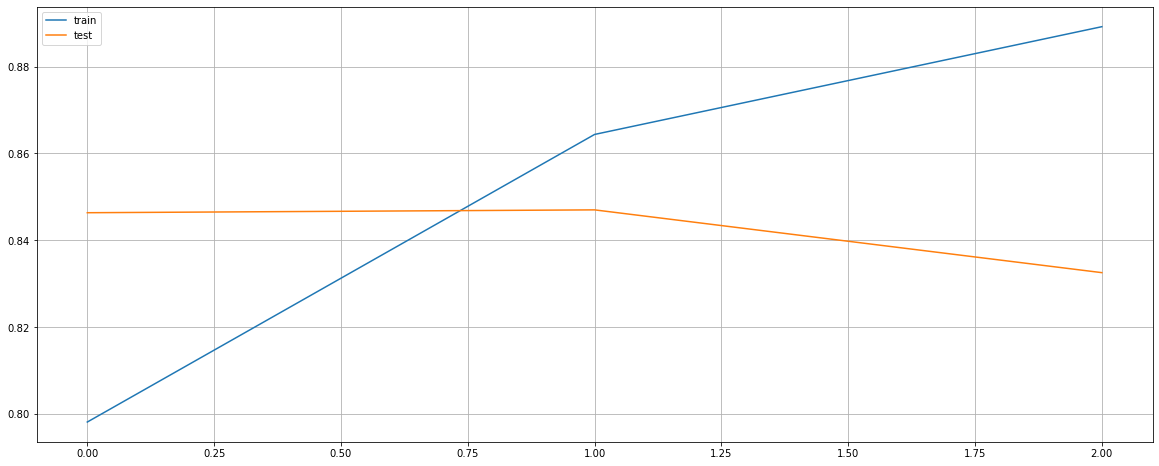

In [97]:
plt.figure(figsize=(20,8))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

<h2 style="color:orange"> Predictions :

In [98]:
result = model.predict([test_input_ids,test_attention_masks])
result = np.round(result).astype(int)
submit = pd.DataFrame(test['id'],columns=['id'])
submit['target'] = result
submit.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [99]:
submit.to_csv('real_nlp_bert.csv',index=False)

<p style="color:red">Bert model achieves the best validation accuracy so far.

<p style="color:darkblue">I am very new at using BERT itself so if you find some errors or mistakes or if you have some suggesstions related to the kernel you are very welcome in the comments section.I'd appreciate it .

<p style="color:darkblue">Thanks for viewing the kernel I hope it may have helped you :)
  Please do <span style="color:brown;font-size:20px">UPVOTE</span> as a token of appreciation if you liked it or learned from it in any way